<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

**Instruções para o Projeto**

* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo `csv` se encontra no endereço abaixo:
    * https://raw.githubusercontent.com/ladpedrino/DataSets/main/violencia_rio.csv
  * Este arquivo `csv` foi pré-processado minimamente por mim, para focar nos pontos aprendidos neste Módulo
  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html
  * Você está livre para apagar, alterar e acrescentar o que quiser!
  * Se você sentiu dificuldade, não se preocupe! Disponibilizei a minha própria solução para servir de guia, porém tente fazer a sua por você mesmo inicialmente.
    * Se sentir perdido é normal, mas acredite: O seu cérebro vai começar a adquirir uma capacidade nova de pensar em hipóteses e questionar dados.
  
  
---
  

# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro (RJ) é um estado brasileiro localizado na região sudeste do Brasil, a sua capital Rio de Janeiro, conhecida como a cidade maravilhosa, constitui como um dos principais pontos turísticos do Brasil. Conhecida pelo visual deslumbrando do pão de açucar, e lindas praias na costa.
Porém a cidade se destaca pelos altos índices de violência e criminalidade, na qual assustam os turstas e moradores. 
Neste artigo, vamos analisar os dados de violência ddo Rio de Janeiro, na qual foi obtido da página de dados abertos do instituto de segurança pública do Rio de Janeiro.

<center><img alt="Rio de Janeiro"width = "60%" src = "https://hotelconsult.com.br/wp-content/uploads/2019/08/SETUR-RJ-2-1.jpg"></center>

## Obtenção dos Dados

Os dados foram obtidos diretamento do portal [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html), que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/ladpedrino/DataSets/main/violencia_rio.csv).

### Importando os dados

In [ ]:
#importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv ('https://raw.githubusercontent.com/ladpedrino/DataSets/main/violencia_rio.csv')

## Análise Inicial dos Dados

* Qual o tamanho do seu DataFrame (`shape`)
* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas


In [ ]:
#Tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  56
Entradas:  344


In [ ]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#Criar a coluna date na primeiram posição (lembrando que começa com 0), com o ano e mês 
df.insert(0,'date',df['mes'].astype(str) + '/' + df['vano'].astype(str))
#df['date'] = df['mes'].astype(str) + '/' + df['vano'].astype(str)

#Converter a variável date para datetime e a formatação Mês/Ano
df['date'] = pd.to_datetime(df['date'], format = '%m/%Y')
df['date'].head()

0   1991-01-01
1   1991-02-01
2   1991-03-01
3   1991-04-01
4   1991-05-01
Name: date, dtype: datetime64[ns]

In [ ]:
df['total_roubos_furtos_veiculos'] = df['furto_veiculos'] + df['roubo_veiculo']


In [ ]:
print(df.dtypes)

date                            datetime64[ns]
vano                                     int64
mes                                      int64
hom_doloso                               int64
lesao_corp_morte                       float64
latrocinio                               int64
hom_por_interv_policial                float64
tentat_hom                               int64
lesao_corp_dolosa                        int64
estupro                                float64
hom_culposo                            float64
lesao_corp_culposa                     float64
roubo_comercio                           int64
roubo_residencia                         int64
roubo_veiculo                            int64
roubo_carga                              int64
roubo_transeunte                         int64
roubo_em_coletivo                        int64
roubo_banco                              int64
roubo_cx_eletronico                    float64
roubo_celular                          float64
roubo_conduca

In [ ]:
df.head()

,date,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,total_roubos_furtos_veiculos
0,1991-01-01,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3,3183
1,1991-02-01,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3,2947
2,1991-03-01,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3,3349
3,1991-04-01,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3,3500
4,1991-05-01,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3,3634


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

furto_bicicleta                 0.802326
roubo_bicicleta                 0.802326
aaapai                          0.523256
posse_drogas                    0.523256
trafico_drogas                  0.523256
apreensao_drogas_sem_autor      0.523256
apf                             0.523256
cmba                            0.523256
cmp                             0.523256
estupro                         0.418605
extorsao                        0.418605
sequestro_relampago             0.418605
estelionato                     0.418605
roubo_apos_saque                0.418605
furto_coletivo                  0.418605
pol_militares_mortos_serv       0.418605
pol_civis_mortos_serv           0.418605
roubo_conducao_saque            0.418605
roubo_cx_eletronico             0.418605
furto_celular                   0.418605
pessoas_desaparecidas           0.383721
encontro_ossada                 0.383721
roubo_celular                   0.313953
ameaca                          0.279070
lesao_corp_morte

Conforme acima, as variáveis `roubo_bicicleta` e `furto_bicicleta` compõe 80% de valores ausentes. Não é recomendável excluir todas os valores,  então vamos verificar o valor da mediana de uma das variáveis, `furto_bicicleta`.





In [ ]:
#verificar o shape antes
shape_antes = df.shape
print("Antes:\t", shape_antes)

#Criar uma cópia do dataframe
df_clear = df.copy()
df_clear.dropna(subset = ['furto_bicicleta'], inplace = True)

#Verificar o shape depois

shape_depois = df_clear.shape
print("Depois:\t", shape_depois)

Antes:	 (344, 58)
Depois:	 (68, 58)


Como exemplo da variável `furto_bicicleta`, se excluir, diminui consideravelmente as entradas, assim a melhor forma é de calcular o valor da mediana e substituir os valores que estão vazios:

In [ ]:
furto_bicicleta_mediana = df.furto_bicicleta.median()
print(furto_bicicleta_mediana)

158.0


In [ ]:
df.fillna(furto_bicicleta_mediana, inplace = True)
df.furto_bicicleta.isnull().sum()

0

Agora vamos fazer a mesma coisa para a variável `roubo_bicicleta`.

In [ ]:
roubo_bicicleta_mediana = df.roubo_bicicleta.median()
print(roubo_bicicleta_mediana)

158.0


In [ ]:
df.fillna(roubo_bicicleta_mediana, inplace = True)
df.roubo_bicicleta.isnull().sum()

0

## Informações Estatísticas da Violência no Rio de Janeiro

Após a análise do dataset e adicionar novas variáveis, o próximo passo é explorar análises estatísticas da violência da cidade.


Para análise de dados estatísticos, como temos muitos valores ausentes, isso se deve por alguns crimes serem registrados na última, para isso, será analisado somente a última decada, à partir do ano de 2009.

In [ ]:
df_ultima_decada = df.query('date >"2009-01-01"')

In [ ]:
df_ultima_decada.head()

,date,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,total_roubos_furtos_veiculos
217,2009-02-01,2009,2,556,4.0,19,75.0,383,6595,322.0,204.0,3230.0,381,136,2367,188,6279,788,3,5.0,659.0,12.0,173.0,158.0,1254,12245,1691,3241,637.0,1743.0,158.0,7416,14728,0.0,123.0,6.0,1644.0,854,356.0,358.0,166.0,1742,1584.0,319.0,793.0,61.0,5889.0,414.0,50,0.0,3.0,2.0,654,7726,2367,55116.0,3,4058
218,2009-03-01,2009,3,588,5.0,30,103.0,444,7183,441.0,239.0,3493.0,465,156,2564,236,6686,926,3,3.0,782.0,18.0,182.0,158.0,1442,13463,1830,2478,762.0,1892.0,158.0,7967,14929,1.0,128.0,2.0,1975.0,980,352.0,476.0,187.0,1880,1923.0,323.0,1108.0,59.0,6719.0,553.0,50,0.0,2.0,1.0,726,8394,2564,61430.0,3,4394
219,2009-04-01,2009,4,542,3.0,27,102.0,423,6705,359.0,189.0,3073.0,450,134,2310,226,6369,769,5,6.0,711.0,10.0,191.0,158.0,1150,12331,1759,2136,688.0,1673.0,158.0,7314,13570,1.0,118.0,5.0,1609.0,856,308.0,404.0,163.0,1788,1851.0,357.0,1038.0,58.0,5922.0,429.0,39,2.0,1.0,2.0,674,7849,2310,55492.0,3,4069
220,2009-05-01,2009,5,522,0.0,14,80.0,386,6565,372.0,194.0,3571.0,418,135,2340,236,6506,780,0,12.0,799.0,17.0,191.0,158.0,1139,12573,1679,2361,740.0,1761.0,158.0,7892,14433,2.0,112.0,8.0,1956.0,878,293.0,411.0,201.0,1795,1821.0,326.0,942.0,46.0,5904.0,401.0,29,3.0,3.0,2.0,616,8085,2340,57585.0,3,4019
221,2009-06-01,2009,6,439,6.0,11,107.0,378,5640,337.0,206.0,3241.0,410,143,1968,221,6277,802,6,8.0,766.0,13.0,178.0,158.0,1078,11870,1638,2072,691.0,1795.0,158.0,7340,13536,0.0,120.0,4.0,1892.0,827,306.0,376.0,165.0,1737,1652.0,265.0,1101.0,44.0,5376.0,451.0,32,3.0,4.0,0.0,563,7845,1968,54415.0,3,3606


In [ ]:
df_ultima_decada.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,total_roubos_furtos_veiculos
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,2013.881890,6.417323,396.149606,3.488189,14.102362,72.685039,445.118110,6437.929134,427.409449,178.952756,3282.645669,507.110236,111.070866,2765.448819,498.952756,6007.645669,824.425197,2.141732,3.503937,1093.779528,8.181102,119.826772,79.188976,1446.811024,13394.685039,1421.488189,2503.874016,808.787402,1548.181102,140.228346,7776.574803,14125.732283,0.574803,140.039370,9.393701,2684.708661,1720.023622,685.937008,879.165354,190.031496,2051.858268,2581.354331,649.149606,1376.511811,94.023622,6020.354331,462.645669,40.330709,2.984252,1.771654,0.291339,486.425197,7925.850394,2765.448819,62487.023622,2.984252,4186.937008
std,3.077347,3.418997,60.923199,2.152393,5.573228,39.087549,85.375698,1064.638549,60.088210,28.567063,710.983351,111.161560,19.061380,1053.266858,270.721694,1404.240944,371.540818,1.384291,2.478075,746.407309,3.900381,44.170143,73.918631,682.675208,4218.400439,138.662080,752.984791,126.516178,264.853671,60.831434,791.304805,1605.684329,0.955516,31.291107,4.715994,525.380574,471.258152,226.238803,248.691616,37.376662,650.126724,486.684108,224.250748,308.178954,67.221438,1102.086272,64.265759,10.867204,2.050878,1.564431,0.605664,81.782573,2390.121034,1053.266858,5811.089107,0.124992,1016.530168
min,2009.000000,1.000000,272.000000,0.000000,5.000000,15.000000,272.000000,2521.000000,230.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,170.000000,2260.000000,345.000000,0.000000,0.000000,301.000000,1.000000,11.000000,0.000000,782.000000,7740.000000,1159.000000,663.000000,167.000000,527.000000,0.000000,3089.000000,5795.000000,0.000000,49.000000,1.000000,717.000000,827.000000,274.000000,358.000000,114.000000,1219.000000,1584.000000,265.000000,695.000000,21.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,1413.000000,31231.000000,2.000000,2683.000000
25%,2011.000000,3.500000,346.000000,2.000000,10.000000,42.000000,375.500000,5651.000000,389.500000,156.000000,2688.500000,412.500000,97.500000,1807.000000,257.500000,4834.500000,554.500000,1.000000,2.000000,496.500000,5.000000,81.000000,13.000000,923.500000,9838.000000,1321.000000,2065.000000,737.500000,1367.000000,155.000000,7361.500000,13391.000000,0.000000,123.000000,6.000000,2337.000000,1325.000000,514.000000,647.000000,165.000000,1478.000000,2162.000000,473.000000,1160.500000,50.500000,5218.000000,417.000000,33.500000,1.000000,1.000000,0.000000,426.000000,6023.000000,1807.000000,57954.500000,3.000000,3353.500000
50%,2014.000000,6.000000,386.000000,3.0000

### Roubo e Furto de Veículos





Através do dataset, vamos analisar as variáveis, roubo e furto de veículos. Sendo que a diferença é que o roubo ele é seguido de utilização do agressor de ameaça e violência contra a vítima.

In [ ]:
df_ultima_decada[['furto_veiculos','roubo_veiculo']].describe()

,furto_veiculos,roubo_veiculo
count,127.000000,127.000000
mean,1421.488189,2765.448819
std,138.662080,1053.266858
min,1159.000000,1413.000000
25%,1321.000000,1807.000000
50%,1390.000000,2479.000000
75%,1499.500000,3478.500000
max,1830.000000,5358.000000


A partir da análise, vemos que:

* A média de roubo de de veículos é muito maior que a média de furto.
* A amplitude de roubos de veículos é maior que a de furtos, para o roubo, o mínimo é 1413 e o máximo chega à 5358 roubos por mês.

### Comparativo entre roubo, furto e recuperação de veículos.

In [ ]:
# ver a média da variável roubo_veiculo
mean_roubo_veiculos = df_ultima_decada.roubo_veiculo.mean()
print(round(mean_roubo_veiculos,2))

2765.45


In [ ]:
# ver a média da variável furto_veiculos
mean_furto_veiculos = df_ultima_decada.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1421.49


In [ ]:
#ver a média da variável de recuperação veículos
mean_recup_veiculos = df_ultima_decada.recuperacao_veiculos.mean()
print(round(mean_recup_veiculos),2)

2052 2


In [ ]:
#Total de veículos roubados e furtados
total = mean_roubo_veiculos + mean_furto_veiculos
#porcentual de veículos recuperados
porcen_recup = mean_recup_veiculos/total * 100
#Média do valor de recuperação
mean_recup_veiculos = df_ultima_decada.recuperacao_veiculos.mean()

print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recup_veiculos))

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(porcen_recup))

Média de Veículos Perdidos por Mês: 4186.94 
Veículos Recuperados por Mês: 2051.86
49.01% dos veículos roubados ou furtados são recuperados.


Além da análise acima, também temos a variável de `recuperação de veículos`, de acordo com a análise dessas três variáveis, vemos que:
* A média de perda de veículos por mês é de 4186.
* Ao mês são recuperados em média 2051 veículos por mês.
* O percentual de veículos recuperados é de 49%.


## Crimes contra a vida

Agora, vamos identificar, qual foi o mínimo e o máximo para a variável `hom_doloso` ao longo do período.  

In [ ]:
mean_hom_doloso = df_ultima_decada.hom_doloso.mean()
print('Média de homícidio doloso: {:.2f}'.format(mean_hom_doloso))

Média de homícidio doloso: 396.15


In [ ]:
min_hom_doloso = df_ultima_decada.hom_doloso.min()
max_hom_doloso = df_ultima_decada.hom_doloso.max()

#imprimir as variáveis
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	588


In [ ]:
#Verificando o mês que teve menor homícidio doloso
df_ultima_decada[df_ultima_decada.hom_doloso == 272]

,date,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,total_roubos_furtos_veiculos
293,2015-06-01,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3,3587


In [ ]:
#Verificando o mês que teve maior homícidio doloso
df_ultima_decada[df_ultima_decada.hom_doloso == 588]

,date,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,total_roubos_furtos_veiculos
218,2009-03-01,2009,3,588,5.0,30,103.0,444,7183,441.0,239.0,3493.0,465,156,2564,236,6686,926,3,3.0,782.0,18.0,182.0,158.0,1442,13463,1830,2478,762.0,1892.0,158.0,7967,14929,1.0,128.0,2.0,1975.0,980,352.0,476.0,187.0,1880,1923.0,323.0,1108.0,59.0,6719.0,553.0,50,0.0,2.0,1.0,726,8394,2564,61430.0,3,4394


  Através da análise de homícidios vimos que:
* O mês e ano que teve maior homícidio doloso foi  em janeiro de 2009.
* A média de homícidio foi de 396 por mês.

### Roubo de banco e caixas eletrônicos

In [ ]:
#Média de roubos em banco
roubo_banco_mean = df_ultima_decada.roubo_banco.mean()

#Média de roubos em caixa eletrônico
roubo_cx_eletronico_mean = df_ultima_decada.roubo_cx_eletronico.mean()


#Soma da média de roubo de banco e caixa eletrônicos
total_banco_mean = roubo_banco_mean + roubo_cx_eletronico_mean

print('A média de roubo de bancos foi: {:.2f}'.format(roubo_banco_mean))
print('A média de roubo de caixas eletrônicos foi: {:.2f}'.format(roubo_cx_eletronico_mean))
print('Total médio de roubo de bancos e caixa eletrônicos foi: {:.2f}'.format(total_banco_mean))

A média de roubo de bancos foi: 2.14
A média de roubo de caixas eletrônicos foi: 3.50
Total médio de roubo de bancos e caixa eletrônicos foi: 5.65


Através da análise das variáveis de `roubo_banco` e `furto_banco`ao longo do período.
*  A média de roubo de caixas eletrônicos é muito maior com 3 roubos por mês.

## Visualização de Dados

Através do dataset vamos analisar os dados através de gráficos.

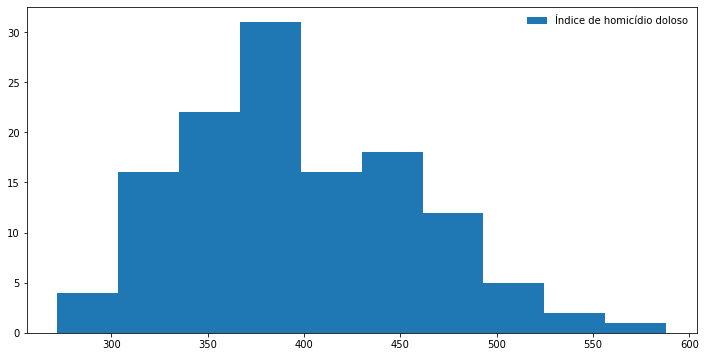

In [ ]:
#Plotagem de gráfico de homícidio doloso
df_ultima_decada.hom_doloso.hist(grid= False, figsize = (12,6), label = 'Índice de homicídio doloso');
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* Em 30 meses, houve de à 350 à 400 homicídios registrados ao longo do período.

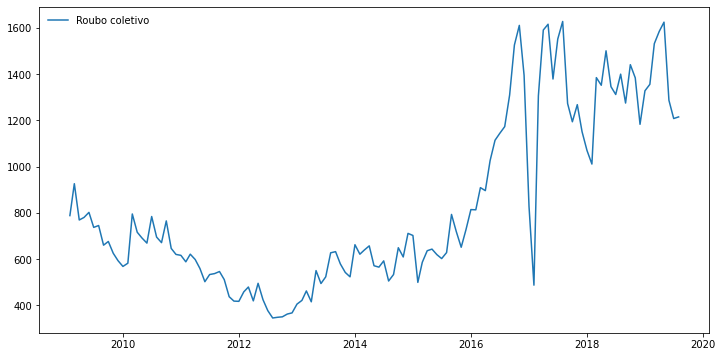

In [ ]:
#Plotagem de gráfico de roubos coletivos
fig, ax = plt.subplots(figsize = (12,6));
ax.plot(df_ultima_decada['date'],df_ultima_decada['roubo_em_coletivo'], label = 'Roubo coletivo');
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* O roubo coletivo está aumentando nos últimos anos.

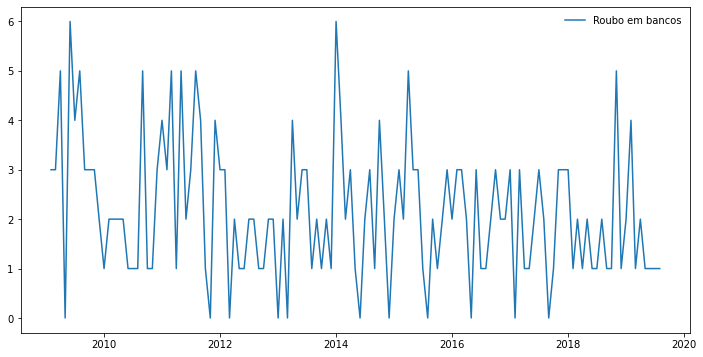

In [ ]:
#Plotagem de gráfico de roubo em bancos 
fig, ax = plt.subplots(figsize = (12,6));
ax.plot(df_ultima_decada['date'],df_ultima_decada['roubo_banco'], label = 'Roubo em bancos');
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* O roubo em bancos está diminuindo nos últimos anos.
* O recorde de roubos em um mês foi de 6 roubos por mês no ano de 2014.

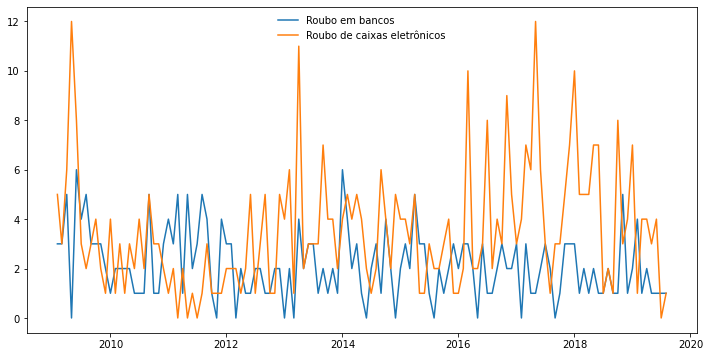

In [ ]:
#Plotagem de gráfico de roubo em caixas eletrônicos e roubo em bancos
fig, ax = plt.subplots(figsize = (12,6));
ax.plot(df_ultima_decada['date'],df_ultima_decada['roubo_banco'], label = 'Roubo em bancos');
ax.plot(df_ultima_decada['date'],df_ultima_decada['roubo_cx_eletronico'], label = 'Roubo de caixas eletrônicos');
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* O roubo de caixas eletrônicos foi superior ao roubo de bancos durante os anos.

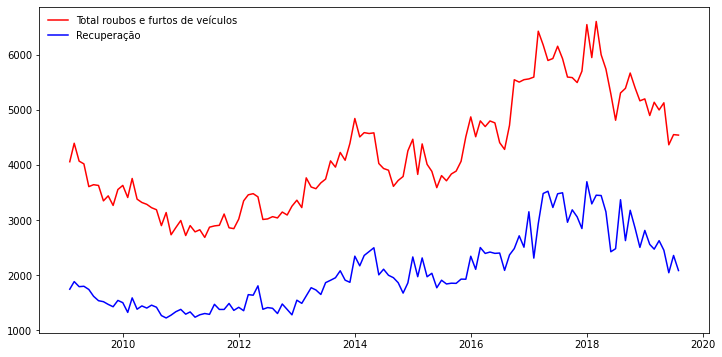

In [ ]:
#Plotagem de gráfico de comparativo total de roubos e furtos de veículos e carros recuperados
fig, ax = plt.subplots(figsize = (12,6));
ax.plot(df_ultima_decada['date'], df_ultima_decada['total_roubos_furtos_veiculos'], color = 'red', label = 'Total roubos e furtos de veículos')
ax.plot(df_ultima_decada['date'],df_ultima_decada['recuperacao_veiculos'], color = 'blue', label = 'Recuperação');
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* As linhas de roubos e recuperação de veículos, estão similares, quer dizer, se um determinado mês teve maior roubos, consequentemente teve maior recuperação de veículos.

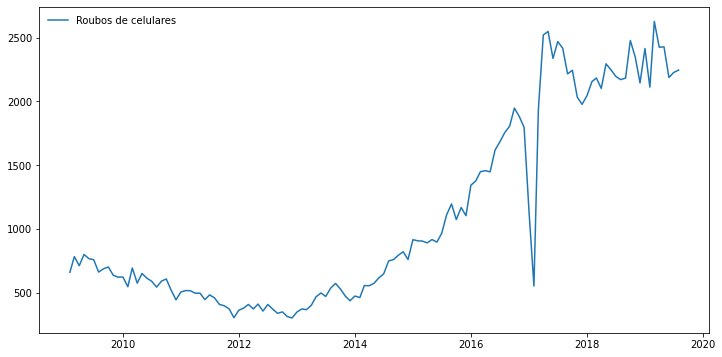

In [ ]:
#Plotagem de gráfico de roubo de celulares
fig, ax = plt.subplots(figsize = (12,6));
ax.plot(df_ultima_decada['date'], df_ultima_decada['roubo_celular'], label = 'Roubos de celulares')
plt.legend(frameon=False);
plt.show();

Através do gráfico acima, concluímos que:
* Nos últimos anos o roubo de celulares vem disparando, isto é devido ao alto consumo do aparelho e a facilidade de roubo do mesmo.

## Conclusão

A partir das análises, podemos concluir que:

* O dataset possui várias variáveis que estão com valores ausentes.
* A recuperação de veículos roubados é de 49%.
* A média de homícidios doloso é de 396 por mês.
* O roubo coletivo vem aumentando durantes os últimos anos. 
* O roubo de bancos e caixas eletrônicos estão dimiuindo nos últimos anos. 